<a href="https://colab.research.google.com/github/Jovin-Joy4121/AI-ML-ELEVATE-TASK-DAY-6/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris (1).csv
Dataset Preview:

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

📊 Evaluating K values from 1 to 9:

🔎 Accuracy for K = 1: 0.9667


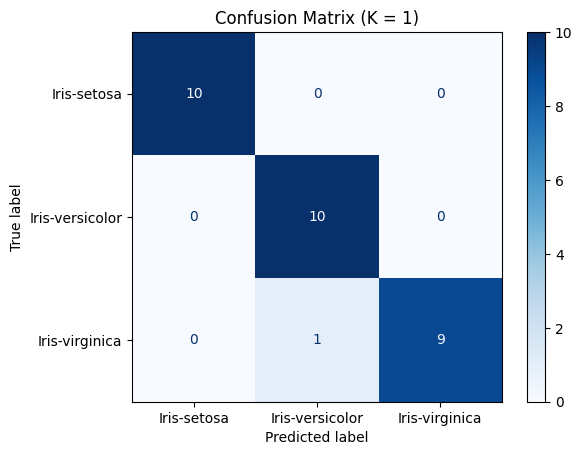


🔎 Accuracy for K = 3: 0.9333


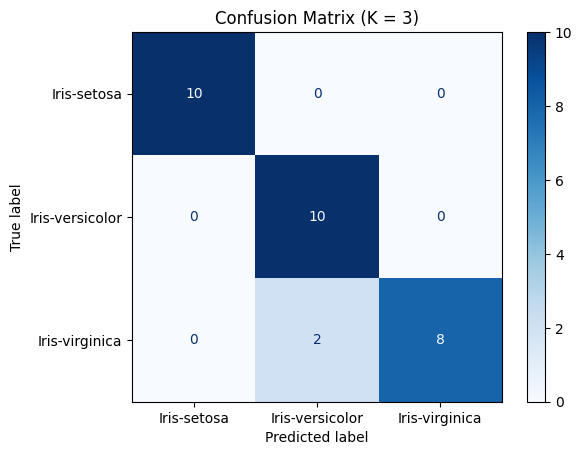


🔎 Accuracy for K = 5: 0.9333


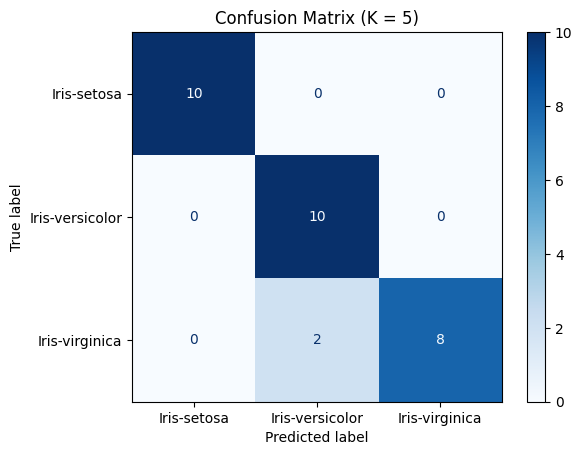


🔎 Accuracy for K = 7: 0.9667


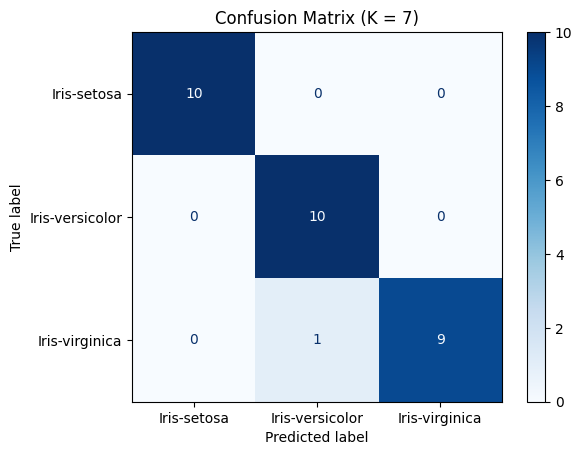


🔎 Accuracy for K = 9: 0.9667


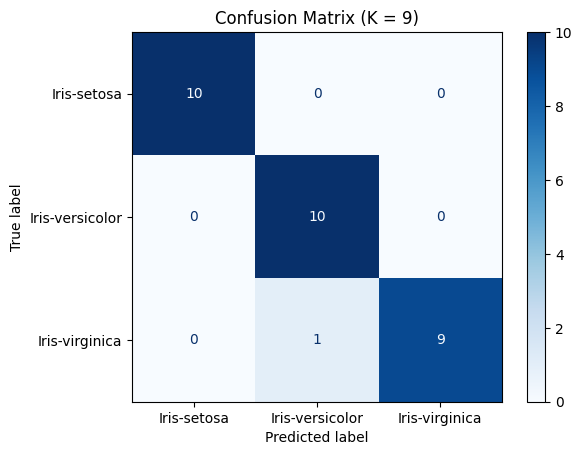

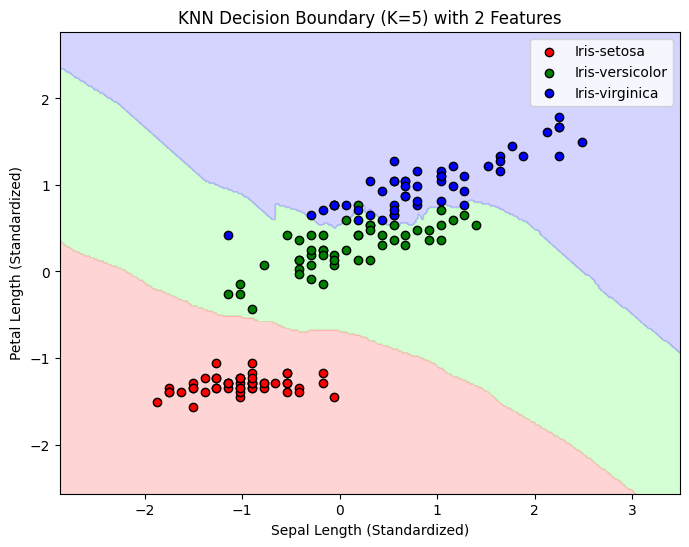

In [3]:
# K-Nearest Neighbors (KNN) Classification - Iris Dataset
# Google Colab version with Upload + Fixes

# Step 1: Upload Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Automatically detect the uploaded file
for filename in uploaded.keys():
    data = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))

# Display the first few rows
print("Dataset Preview:\n")
print(data.head())

# Step 2: Data Preprocessing
if 'Id' in data.columns:
    data.drop('Id', axis=1, inplace=True)

X = data.drop('Species', axis=1)
y = data['Species']

# Encode labels for plotting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train and Evaluate KNN for multiple K values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_knn(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔎 Accuracy for K = {k}: {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (K = {k})")
    plt.show()

print("\n📊 Evaluating K values from 1 to 9:")
for k in [1, 3, 5, 7, 9]:
    evaluate_knn(k)

# Step 4: Visualize Decision Boundaries using 2D Features
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(k):
    X_2D = X_scaled[:, [0, 2]]  # SepalLength and PetalLength
    y_2D = y_encoded  # Numeric version of labels

    X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(
        X_2D, y_2D, test_size=0.2, random_state=42, stratify=y_2D
    )

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2D, y_train2D)

    x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
    y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    for i, label in enumerate(np.unique(y_2D)):
        plt.scatter(
            X_2D[y_2D == label, 0],
            X_2D[y_2D == label, 1],
            c=cmap_bold[i],
            label=le.inverse_transform([label])[0],
            edgecolor='k'
        )

    plt.title(f"KNN Decision Boundary (K={k}) with 2 Features")
    plt.xlabel("Sepal Length (Standardized)")
    plt.ylabel("Petal Length (Standardized)")
    plt.legend()
    plt.show()

plot_decision_boundary(k=5)
